
# Plotnine: Grammar of Graphics for Python
### A translation of the visualisation chapters from "R for Data Science" to Python using Plotnine and Pandas.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/datascienceworkshops/r4ds-python-plotnine/master?filepath=output%2Fr4ds-python-plotnine.ipynb)

# [3](https://r4ds.had.co.nz/data-visualisation.html)&nbsp;&nbsp;&nbsp;Data visualisation

## [3.1](https://r4ds.had.co.nz/data-visualisation.html#introduction-1)&nbsp;&nbsp;&nbsp;Introduction

> "The simple graph has brought more information to the data analyst’s mind 
> than any other device." --- John Tukey

This post will teach you how to visualise your data using plotnine. Python has many packages for making graphs, but plotnine is one of the most elegant and most versatile. plotnine implements the __grammar of graphics__, a coherent system for describing and building graphs. With plotnine, you can do more faster by learning one system and applying it in many places.

If you'd like to learn more about the theoretical underpinnings of plotnine before you start, I'd recommend reading [The Layered Grammar of Graphics](http://vita.had.co.nz/papers/layered-grammar.pdf).

### [3.1.1](https://r4ds.had.co.nz/data-visualisation.html#prerequisites-1)&nbsp;&nbsp;&nbsp;Prerequisites

This post focusses on plotnine. We'll also use a little numpy and pandas for data manipulation. To access the datasets, help pages, and functions that we will use in this post, import the necessary packages by running this code:

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

## [28.5](https://r4ds.had.co.nz/graphics-for-communication.html#zooming)&nbsp;&nbsp;&nbsp;Zooming

There are three ways to control the plot limits:

1. Adjusting what data are plotted
1. Setting the limits in each scale
1. Setting `xlim` and `ylim` in `coord_cartesian()`

To zoom in on a region of the plot, it's generally best to use `coord_cartesian()`. Compare the following two plots:

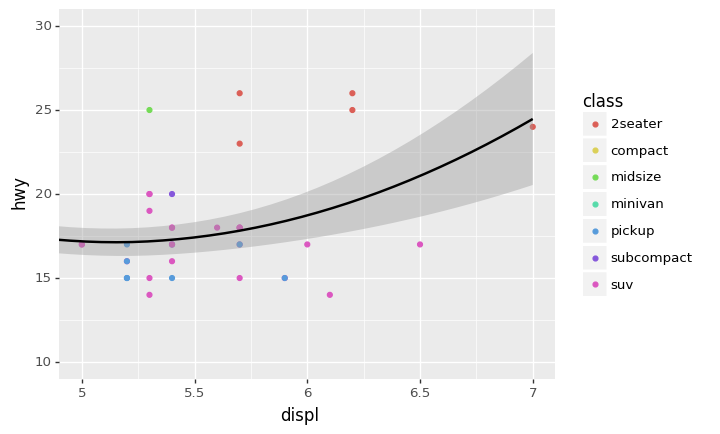

<ggplot: (299128673)>

In [3]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

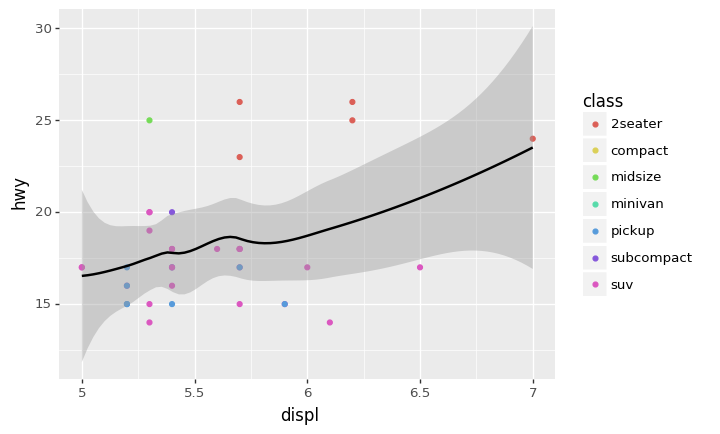

<ggplot: (299272225)>

In [4]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

You can also set the `limits` on individual scales. Reducing the limits is basically equivalent to subsetting the data. It is generally more useful if you want _expand_ the limits, for example, to match scales across different plots. For example, if we extract two classes of cars and plot them separately, it's difficult to compare the plots because all three scales (the x-axis, the y-axis, and the colour aesthetic) have different ranges.

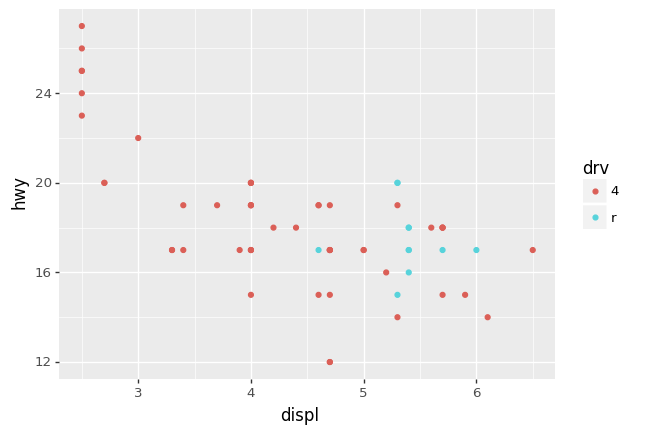

<ggplot: (299215513)>

In [5]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

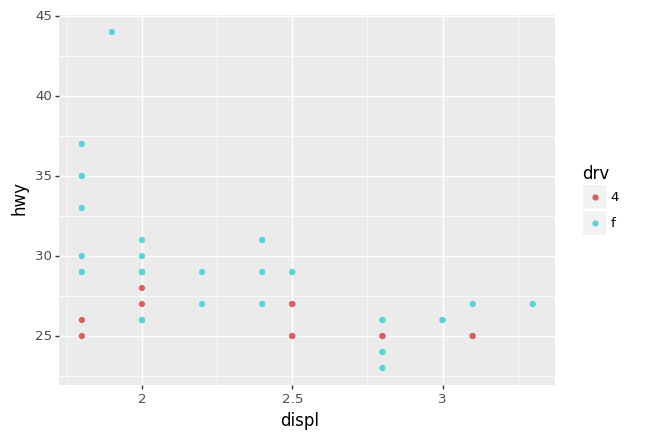

<ggplot: (299223917)>

In [6]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

One way to overcome this problem is to share scales across multiple plots, training the scales with the `limits` of the full data.

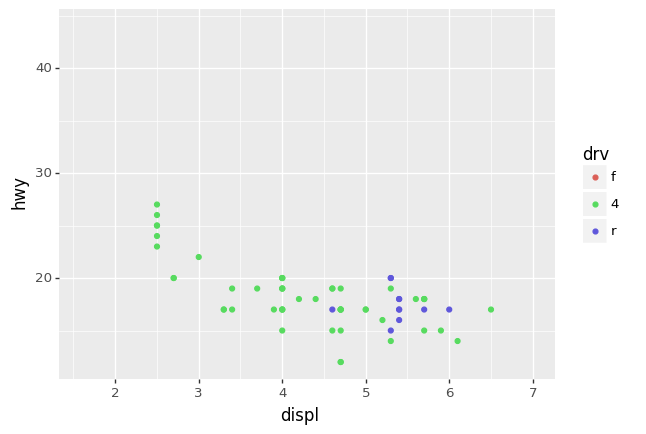

<ggplot: (300274797)>

In [7]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

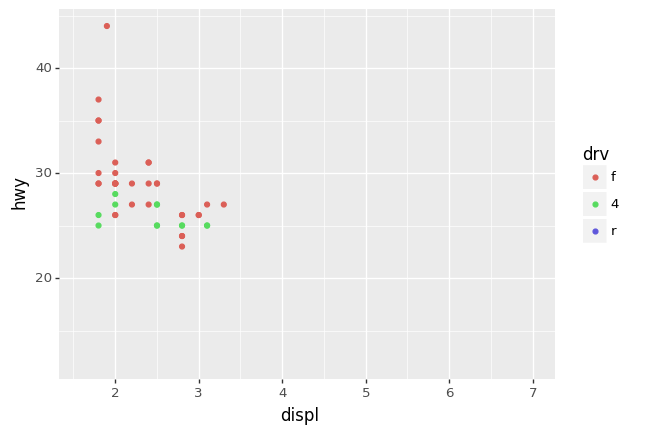

<ggplot: (300393433)>

In [8]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

In this particular case, you could have simply used faceting, but this technique is useful more generally, if for instance, you want spread plots over multiple pages of a report.

## [28.6](https://r4ds.had.co.nz/graphics-for-communication.html#themes)&nbsp;&nbsp;&nbsp;Themes

Finally, you can customise the non-data elements of your plot with a theme:

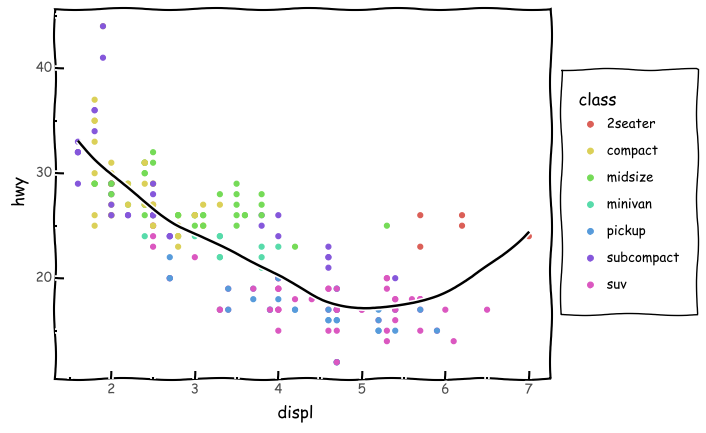

<ggplot: (297333733)>

In [9]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

plotnine includes twelve themes by default. The figure below shows eight of those. The [documentation](https://plotnine.readthedocs.io/en/stable/api.html#themes) lists all available themes.

<img src="../input/images/visualization-themes.png" width="500" style="margin-left: 0px;">

Many people wonder why the default theme has a grey background. This was a deliberate choice because it puts the data forward while still making the grid lines visible. The white grid lines are visible (which is important because they significantly aid position judgements), but they have little visual impact and we can easily tune them out. The grey background gives the plot a similar typographic colour to the text, ensuring that the graphics fit in with the flow of a document without jumping out with a bright white background. Finally, the grey background creates a continuous field of colour which ensures that the plot is perceived as a single visual entity.

It's also possible to control individual components of each theme, like the size and colour of the font used for the y axis. Unfortunately, this level of detail is outside the scope of this book, so you'll need to read the [ggplot2 book](https://amzn.com/331924275X) for the full details. You can also create your own themes, if you are trying to match a particular corporate or journal style.

## [28.7](https://r4ds.had.co.nz/graphics-for-communication.html#saving-your-plots)&nbsp;&nbsp;&nbsp;Saving your plots

## [28.8](https://r4ds.had.co.nz/graphics-for-communication.html#learning-more-4)&nbsp;&nbsp;&nbsp;Learning more

The absolute best place to learn more is the ggplot2 book: [_plotnine: Elegant graphics for data analysis_](https://amzn.com/331924275X). It goes into much more depth about the underlying theory, and has many more examples of how to combine the individual pieces to solve practical problems. Unfortunately, the book is not available online for free, although you can find the source code at <https://github.com/hadley/plotnine-book>.
